In [1]:
# Install required libraries
!pip install pandas matplotlib statsmodels scikit-learn

In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving web_traffic.csv to web_traffic.csv


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('web_traffic.csv')  # Replace with your file name

# Inspect the first few rows
print("First few rows of the dataset:")
print(data.head())

# Check the structure of the dataset
print("\nDataset Info:")
print(data.info())

First few rows of the dataset:
             Timestamp  TrafficCount
0  2020-01-20 00:00:00         487.0
1  2020-01-20 00:30:00         385.0
2  2020-01-20 01:30:00         269.0
3  2020-01-20 02:30:00         517.0
4  2020-01-20 03:30:00         129.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     2793 non-null   object 
 1   TrafficCount  2793 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.8+ KB
None


In [4]:
# Convert the 'Timestamp' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set 'Timestamp' as the index
data.set_index('Timestamp', inplace=True)

# Handle missing values (e.g., forward-fill)
data = data.fillna(method='ffill')

# Verify the preprocessed dataset
print("\nPreprocessed Dataset:")
print(data.head())


Preprocessed Dataset:
                     TrafficCount
Timestamp                        
2020-01-20 00:00:00         487.0
2020-01-20 00:30:00         385.0
2020-01-20 01:30:00         269.0
2020-01-20 02:30:00         517.0
2020-01-20 03:30:00         129.0


<ipython-input-4-bd7aa6920aee>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


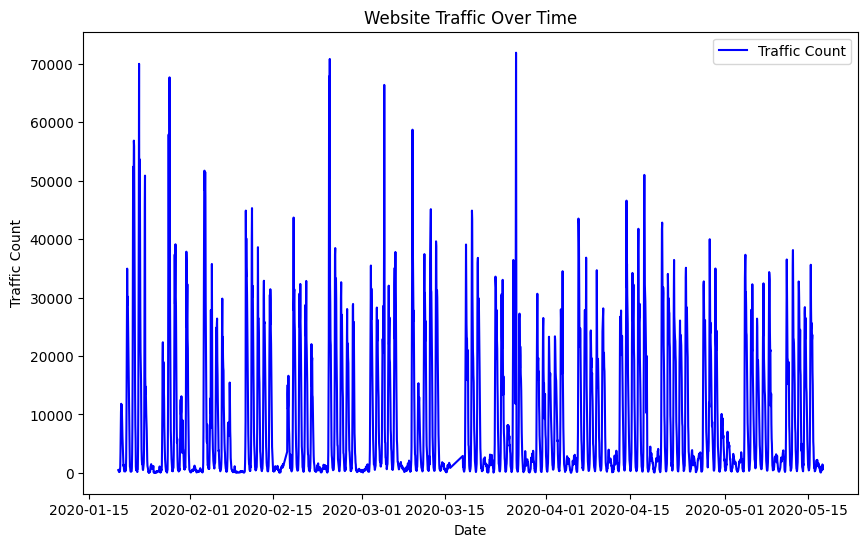

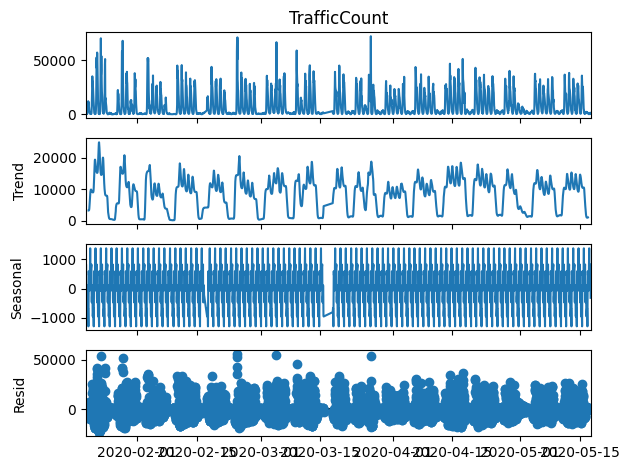

In [5]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['TrafficCount'], label='Traffic Count', color='blue')
plt.title('Website Traffic Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Count')
plt.legend()
plt.show()

# Decompose the time series into trend, seasonality, and residuals
decomposition = seasonal_decompose(data['TrafficCount'], model='additive', period=30)
decomposition.plot()
plt.show()

In [6]:
# Split the data into training and testing sets
train = data[:int(0.8 * len(data))]  # First 80% for training
test = data[int(0.8 * len(data)):]  # Last 20% for testing

# Verify the split
print(f"Training set size: {len(train)}")
print(f"Testing set size: {len(test)}")

Training set size: 2234
Testing set size: 559


In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMAX (ARIMA) model
model = SARIMAX(train['TrafficCount'], order=(5, 1, 0), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()

# Print a summary of the model
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           TrafficCount   No. Observations:                 2234
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -22104.839
Date:                Sun, 04 May 2025   AIC                          44221.678
Time:                        17:28:11   BIC                          44255.944
Sample:                             0   HQIC                         44234.190
                               - 2234                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3127      0.008     39.457      0.000       0.297       0.328
ar.L2         -0.1090      0.009    -12.050      0.000      -0.127      -0.091
ar.L3          0.0606      0.012      5.225      0.0

In [8]:
# Make predictions for the test set
predicted_mean = model_fit.forecast(steps=len(test))

# Display the predicted values
print("\nPredicted Values:")
print(predicted_mean)


Predicted Values:
2234    12027.867989
2235    12024.650560
2236    12244.084113
2237    12464.188597
2238    12512.258546
            ...     
2788    12533.575735
2789    12533.575735
2790    12533.575735
2791    12533.575735
2792    12533.575735
Name: predicted_mean, Length: 559, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(test['TrafficCount'], predicted_mean)

# Calculate RMSE manually
rmse = np.sqrt(mean_squared_error(test['TrafficCount'], predicted_mean))

# Display the evaluation metrics
print(f"\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Evaluation Metrics:
Mean Absolute Error (MAE): 9980.98
Root Mean Squared Error (RMSE): 10785.23


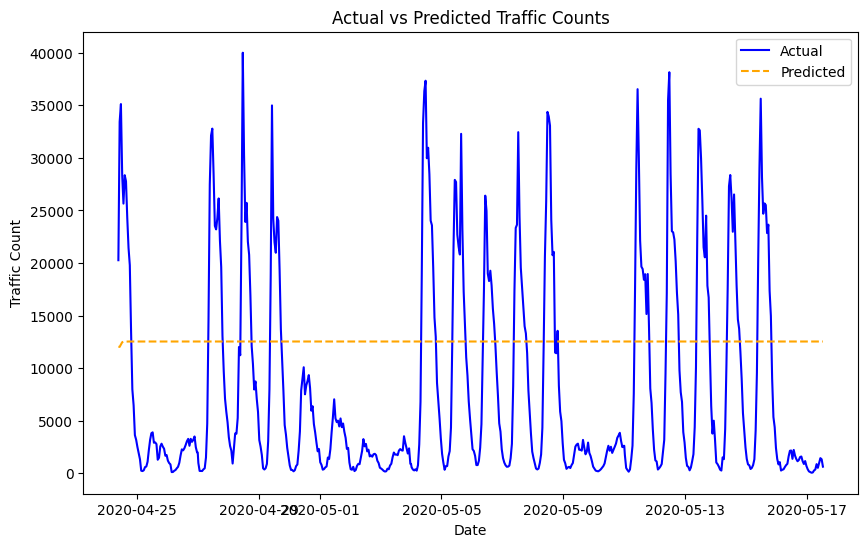

In [10]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['TrafficCount'], label='Actual', color='blue')
plt.plot(test.index, predicted_mean, label='Predicted', color='orange', linestyle='--')
plt.title('Actual vs Predicted Traffic Counts')
plt.xlabel('Date')
plt.ylabel('Traffic Count')
plt.legend()
plt.show()

In [13]:
from google.colab import files
import pandas as pd

# Create a DataFrame to store results
results = pd.DataFrame({'Actual': test['TrafficCount'], 'Predicted': predicted_mean})

# Save results to a CSV file
results.to_csv('traffic_forecast_results.csv', index=False)

# Download the file
files.download('traffic_forecast_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>